<a href="https://colab.research.google.com/github/thilinakalansooriya/ML_assiment/blob/main/it17154086.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import tensorflow as tf
os.environ['TFHUB_MODEL_LOAD_FORMAT']='COMPRESSED'
gpus= tf.config.experimental.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(gpus[0], True)

In [18]:
import IPython.display as display 
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize']=(12,12)  
mpl.rcParams['axes.grid']= False

import numpy as np
import PIL.Image  
import time
import functools

In [8]:
content_path= tf.keras.utils.get_file("nwhnRsZ.jpg", "https://imgur.com/nwhnRsZ.jpg")
style_path=tf.keras.utils.get_file("starry_night.jpg", "https://i.imgur.com/9ooB60I.jpg")

90112/84167 [================================] - 0s 0us/step


In [20]:
max_dim=512
path_to_image=content_path
img=tf.io.read_file(path_to_image) 
img=tf.image.decode_image(img, channels=3) 
img = tf.image.convert_image_dtype(img, tf.float32)
shape=tf.cast(tf.shape(img)[:-1], tf.float32)
long_dim=max(shape)
scale=max_dim/long_dim
new_shape=tf.cast(shape*scale, tf.int32)

img=tf.image.resize(img, new_shape)
img = img[tf.newaxis, :]  
img.shape

TensorShape([1, 512, 399, 3])

In [10]:
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

In [21]:
def imshow(image, title=None):
    if len(image.shape)>3:
        image = tf.squeeze(image, axis=0) 
    plt.imshow(image)
    if title:
        plt.title(title)

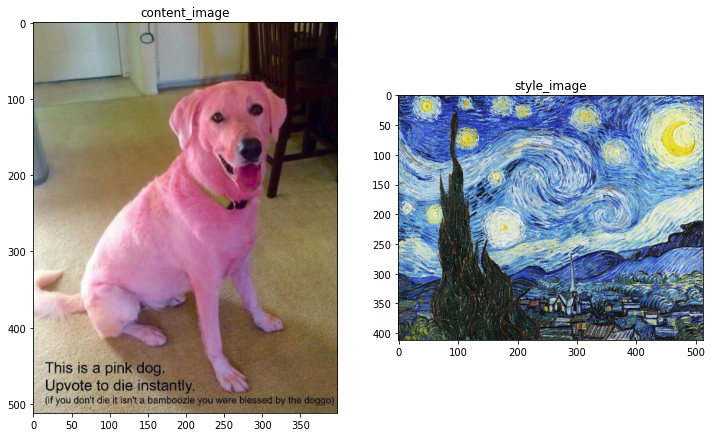

In [22]:
content_image=load_img(content_path)
style_image=load_img(style_path)
plt.subplot(1,2,1)
imshow(content_image,'content_image')
plt.subplot(1,2,2)
imshow(style_image,'style_image')

In [13]:
import tensorflow_hub as hub
hub_model=hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [14]:
def tensor_to_image(tensor):
    tensor= tensor*255
    tensor=np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor)>3:
        assert tensor.shape[0]==1
        tensor=tensor[0]
    return PIL.Image.fromarray(tensor)

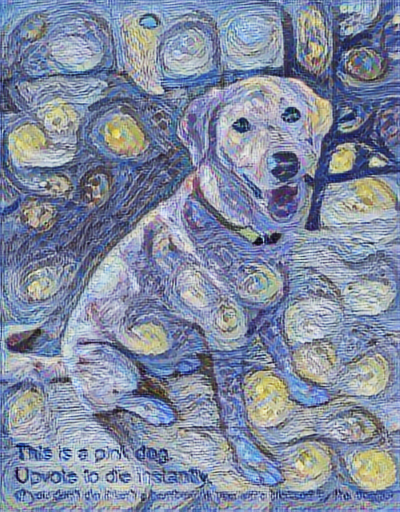

In [15]:
stylized_image= hub_model(tf.constant(content_image), tf.constant(style_image))[0]
tensor_to_image(stylized_image)